<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Cat_and_dogs_model_agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow

tensorflow.__version__

'2.5.0'

In [3]:
!nvidia-smi

Fri Aug  6 07:23:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip"

In [6]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# With Augmentation

train_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')
valid_datagen = ImageDataGenerator(rescale= 1./255,)

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [14]:
%%time

hist_mnist = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 50s 185ms/step - loss: 0.7012 - accuracy: 0.5130 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6946 - accuracy: 0.5025 - val_loss: 0.6902 - val_accuracy: 0.4950
Epoch 3/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6900 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.6936 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6934 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6934 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 -

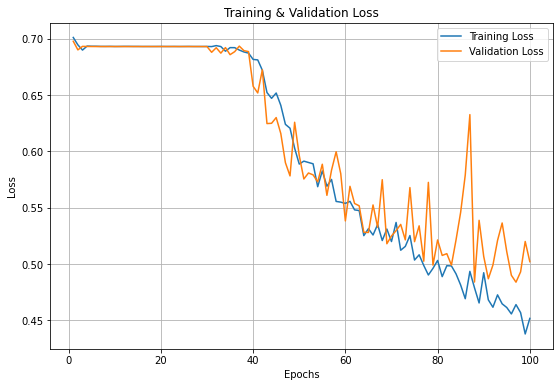

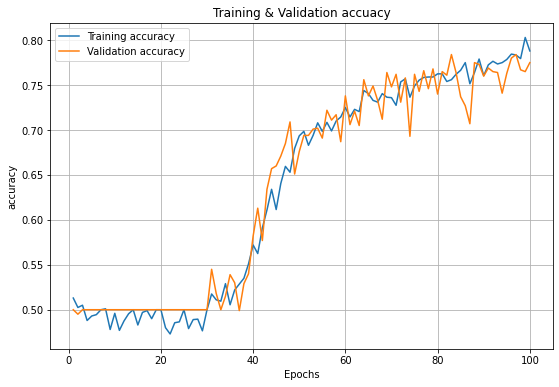

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['accuracy'])
plt.plot(epochs, hist_mnist.history['val_accuracy'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation accuacy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 57ms/step - loss: 0.5528 - accuracy: 0.7320
Loss = 0.55283
Accuracy = 0.73200


In [18]:
from tensorflow.keras.models import load_model
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

KeyboardInterrupt: ignored

In [24]:
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')